# FSD Tracks

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
paths_trackdrive = []

for root, dirs, files in os.walk('./'):
    for name in files:
        if name.startswith('fsds') and not name.endswith('center_line.csv') and name.endswith('.csv'):
            paths_trackdrive.append(os.path.join(root, name))

paths_skidpad = []

for root, dirs, files in os.walk('./'):
    for name in files:
        if name.endswith('skidpad_cones.csv'):
            paths_skidpad.append(os.path.join(root, name))

paths_acceleration = []

for root, dirs, files in os.walk('./'):
    for name in files:
        if name.endswith('acceleration_cones.csv'):
            paths_acceleration.append(os.path.join(root, name))

            

In [14]:
# copy all the files from the paths to the directory 'FSD_tracks/csv'

for path in paths_acceleration:
    os.system('cp ' + path + ' FSD_tracks/csv/')

In [11]:
# Example of what the data looks like
df = pd.read_csv(paths_trackdrive[1])
df.groupby('cone_type').first() # showing one row of each unique value in the column cone_type

,X,Y,Z,std_X,std_Y,std_Z,right,left
cone_type,,,,,,,,
big_orange,1.452300,5.571885,0.0,0.0,0.0,0.0,1,0
blue,-1.900122,9.187114,0.0,0.0,0.0,0.0,0,1
yellow,1.459683,9.223716,0.0,0.0,0.0,0.0,1,0


In [15]:
def plot_fsd_track(path: str, ax=None, s1=10, s2=50):
    df = pd.read_csv(path)

    if ax is None:
        fig, ax = plt.subplots()

    ax.scatter(df['X'][df['cone_type'] == 'small_orange'], df['Y'][df['cone_type'] == 'small_orange'], c='orange', s=s1, marker='^')  # plotting the small orange cones
    ax.scatter(df['X'][df['cone_type'] == 'yellow'], df['Y'][df['cone_type'] == 'yellow'], c='yellow', s=s1, marker='^')          # plotting the yellow cones
    ax.scatter(df['X'][df['cone_type'] == 'blue'], df['Y'][df['cone_type'] == 'blue'], c='blue', s=s1, marker='^')                # plotting the blue cones
    ax.scatter(df['X'][df['cone_type'] == 'big_orange'], df['Y'][df['cone_type'] == 'big_orange'], c='orange', s=s2, marker='^')  # plotting the big orange cones

    ax.set_title('@github: ' + path, fontsize=24)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')

    # set xlim and ylim
    margin = 5
    ax.set_xlim(min(df['X']) - margin, max(df['X']) + margin)
    ax.set_ylim(min(df['Y']) - margin, max(df['Y']) + margin)
    plt.tight_layout()

## Trackdrive

Text(0.5, 1.05, 'Track-drive tracks')

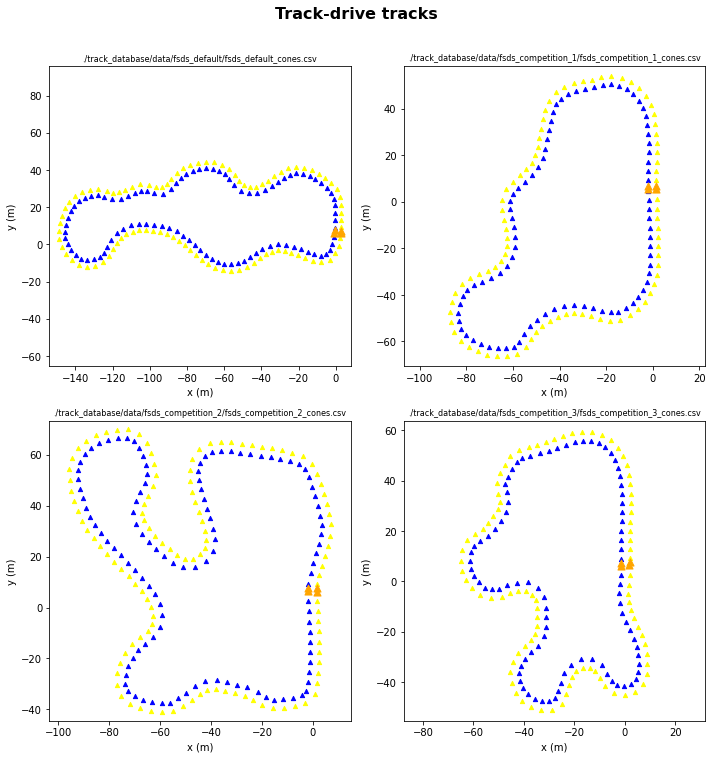

In [136]:
# make a figure with 4 subplots of the 4 tracks
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, path in enumerate(paths_trackdrive):
    plot_fsd_track(path, ax[i//2, i%2], s1=18, s2=50)
fig.tight_layout()
fig.suptitle('Track-drive tracks', fontsize=16, y=1.05, fontweight='bold')
# fig.savefig('trackdrive_tracks.png', dpi=400, bbox_inches='tight')

## Skidpad

Text(0.5, 1.05, 'Skidpad tracks')

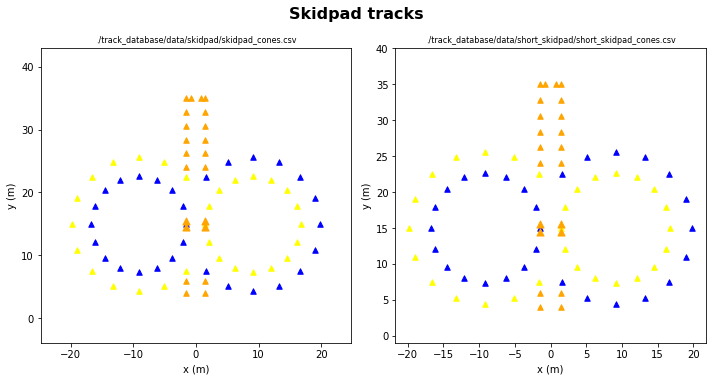

In [137]:
# plot the 2 skidpad tracks
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, path in enumerate(paths_skidpad):
    plot_fsd_track(path, ax[i], s1=30, s2=50)
fig.tight_layout()
fig.suptitle('Skidpad tracks', fontsize=16, y=1.05, fontweight='bold')
# fig.savefig('skidpad_tracks.png', dpi=400, bbox_inches='tight')


## Acceleration

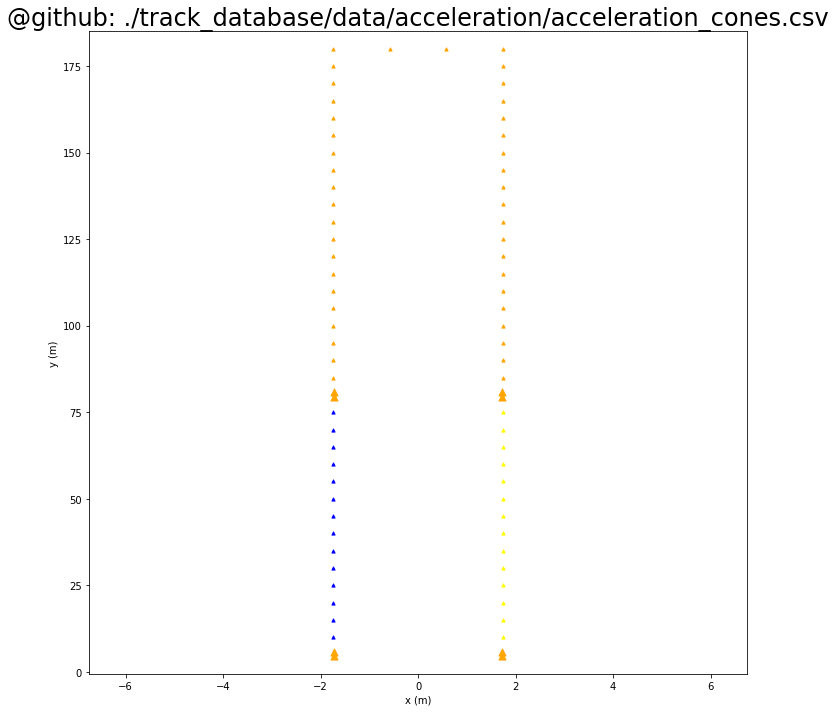

In [23]:
# plot the 1 acceleration track

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_fsd_track(paths_acceleration[0], ax)
fig.tight_layout()
# fig.suptitle('Acceleration track', fontsize=16, y=1.05, fontweight='bold')
# plt.axis('equal')
save_title = 'acceleration__' + paths_acceleration[0].split('/')[-1].split('.')[0]
# fig.savefig('FSD_tracks/img/' + save_title + '.png', dpi=1200, bbox_inches='tight')